# Insurance Fraud Claims Detection

## Premises

This notebook is based on the **Auto Insurance Claims Data** on Kaggle

https://www.kaggle.com/buntyshah/insurance-fraud-claims-detection

https://www.kaggle.com/buntyshah/auto-insurance-claims-data

The goal is not training the model. I need to explore the different approaches we have to write Production Code for Machine Learning Deployment.

## Libraries and Environments

In [1]:
# Data Sciences
import numpy as np 
import pandas as pd 

# Plot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Utils
import os

# Set notebook
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

/usr/local/lib/python3.6/dist-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [2]:
raw = '../data/raw/insurance_claims.csv'
interim = '../data/interim/'
processed= '../data/processed/'
models= '../models/'

## Data Analysis

### Read Data

In [3]:
data = pd.read_csv(raw)

# data shape
print(data.shape)

#visualize data
data.head()

(1000, 40)


,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-01-10,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


## Exploratory Data Analysis (EDA)

The dataset contains 1000 rows, one for each policy, and 40 columns or variables.

Let's identify...

1. Missing values
2. Numerical variables
3. Distribution of the numerical variables
4. Outliers
5. Categorical variables
6. Cardinality of the categorical variables
7. Potential relationship between the variables and the target: fraud_reported

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
months_as_customer             1000 non-null int64
age                            1000 non-null int64
policy_number                  1000 non-null int64
policy_bind_date               1000 non-null object
policy_state                   1000 non-null object
policy_csl                     1000 non-null object
policy_deductable              1000 non-null int64
policy_annual_premium          1000 non-null float64
umbrella_limit                 1000 non-null int64
insured_zip                    1000 non-null int64
insured_sex                    1000 non-null object
insured_education_level        1000 non-null object
insured_occupation             1000 non-null object
insured_hobbies                1000 non-null object
insured_relationship           1000 non-null object
capital-gains                  1000 non-null int64
capital-loss                   1000 non-null int64
incident_date    

In [5]:
data['_c39']

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
6     NaN
7     NaN
8     NaN
9     NaN
10    NaN
11    NaN
12    NaN
13    NaN
14    NaN
15    NaN
16    NaN
17    NaN
18    NaN
19    NaN
20    NaN
21    NaN
22    NaN
23    NaN
24    NaN
25    NaN
26    NaN
27    NaN
28    NaN
29    NaN
30    NaN
31    NaN
32    NaN
33    NaN
34    NaN
35    NaN
36    NaN
37    NaN
38    NaN
39    NaN
40    NaN
41    NaN
42    NaN
43    NaN
44    NaN
45    NaN
46    NaN
47    NaN
48    NaN
49    NaN
50    NaN
51    NaN
52    NaN
53    NaN
54    NaN
55    NaN
56    NaN
57    NaN
58    NaN
59    NaN
60    NaN
61    NaN
62    NaN
63    NaN
64    NaN
65    NaN
66    NaN
67    NaN
68    NaN
69    NaN
70    NaN
71    NaN
72    NaN
73    NaN
74    NaN
75    NaN
76    NaN
77    NaN
78    NaN
79    NaN
80    NaN
81    NaN
82    NaN
83    NaN
84    NaN
85    NaN
86    NaN
87    NaN
88    NaN
89    NaN
90    NaN
91    NaN
92    NaN
93    NaN
94    NaN
95    NaN
96    NaN
97    NaN
98    NaN
99    NaN


**Comment**

We notice that two variables have - as separator. 

Also we have a empty variables **_c39**

Finally, it seems that missing values in categorical variables are indicated with '?'

In [6]:
#Important - Data Engineering misses - in the variable below. Also we have _c39
data.drop('_c39', axis=1, inplace=True)
data.rename(columns={"capital-gains": "capital_gains", "capital-loss": "capital_loss"}, inplace=True)
data.to_csv(processed + 'sample.csv', index=False)

### Missing values

**Replace Missing values**

In [7]:
missing_variables= [col for col in data.select_dtypes(include='object').columns if any(data[col].str.contains('?', regex=False))]
data[missing_variables] = data[missing_variables].replace('?', np.nan)

### Target variable: fraud_reported

Text(0.5, 1.0, 'fraud_reported distribution')

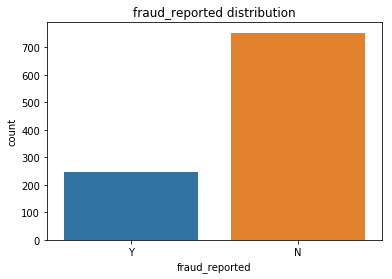

In [8]:
sns.countplot(data['fraud_reported'])
plt.title('fraud_reported distribution')

**Comment**

The sample is unbalanced. 

We have to convert into categorical

### Numerical variables

#### Numerical variables

In [9]:
numerical_variables = [col for col in data.columns if data[col].dtypes != 'object']

print('Number of numerical variables: ', len(numerical_variables))

data[numerical_variables].head()

Number of numerical variables:  18


,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital_gains,capital_loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
0,328,48,521585,1000,1406.91,0,466132,53300,0,5,1,1,2,71610,6510,13020,52080,2004
1,228,42,342868,2000,1197.22,5000000,468176,0,0,8,1,0,0,5070,780,780,3510,2007
2,134,29,687698,2000,1413.14,5000000,430632,35100,0,7,3,2,3,34650,7700,3850,23100,2007
3,256,41,227811,2000,1415.74,6000000,608117,48900,-62400,5,1,1,2,63400,6340,6340,50720,2014
4,228,44,367455,1000,1583.91,6000000,610706,66000,-46000,20,1,0,1,6500,1300,650,4550,2009


In [10]:
data[numerical_variables].describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital_gains,capital_loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


**Comment**

It seems policy_number is ID variable. We're going to drop it

In [11]:
policy_labels = len(data.policy_number.unique())

print('Number of labels: {}'.format(policy_labels))
    
print('Number of cases', len(data))

Number of labels: 1000
Number of cases 1000


#### Time variables

**Convert policy_bind_date and incident_date into datatime**

In [12]:
data['policy_bind_date'] = pd.to_datetime(data["policy_bind_date"])
data['incident_date'] = pd.to_datetime(data["incident_date"])

In [13]:
time_variables = [col for col in data.columns if 'year' in col or 'date' in col]
data[time_variables]

,policy_bind_date,incident_date,auto_year
0,2014-10-17,2015-01-25,2004
1,2006-06-27,2015-01-21,2007
2,2000-09-06,2015-02-22,2007
3,1990-05-25,2015-01-10,2014
4,2014-06-06,2015-02-17,2009
5,2006-10-12,2015-01-02,2003
6,2000-06-04,2015-01-13,2012
7,1990-02-03,2015-02-27,2015
8,1997-02-05,2015-01-30,2012
9,2011-07-25,2015-01-05,1996


**Analyze the relationship between auto_year and the fraud_reported**

Text(0.5, 1.0, 'Change in House price with the years')

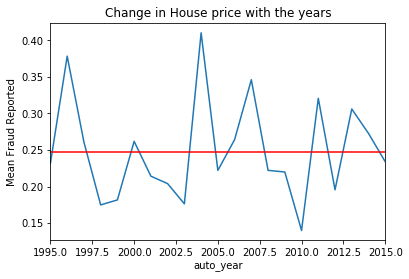

In [14]:
time_data = data.copy()
time_data['fraud_reported'] =  np.where(time_data['fraud_reported'] == 'Y', 1, 0)
time_data.groupby('auto_year')['fraud_reported'].mean().plot()
mean = time_data['fraud_reported'].mean()
plt.axhline(y=mean, color='r', linestyle='-')
plt.ylabel('Mean Fraud Reported')
plt.title('Change in House price with the years')

**Comment** : I was expected an different trend. For example, if the car is old I would fraud to get insurance premium

**Analyze the relationship between new variable, Time_to_incident and fraud_reported**

In [15]:
#Calculate the time_to_incident_days variable
time_data['time_to_incident_days'] = time_data['incident_date'] - time_data['policy_bind_date']
time_data['time_to_incident_days'] = time_data['time_to_incident_days'].dt.days
time_data['time_to_incident_months'] = time_data['time_to_incident_days'] / 30

#Binning time_to_incident_days variable
time_data['bin_dec'] = pd.qcut(time_data['time_to_incident_months'], q=10, precision=0)
time_data['bin_dec'].value_counts()

(281.0, 306.0]    100
(252.0, 281.0]    100
(222.0, 252.0]    100
(189.0, 222.0]    100
(156.0, 189.0]    100
(128.0, 156.0]    100
(97.0, 128.0]     100
(66.0, 97.0]      100
(30.0, 66.0]      100
(-2.0, 30.0]      100
Name: bin_dec, dtype: int64

Text(0.5, 1.0, 'Change in House price with the months')

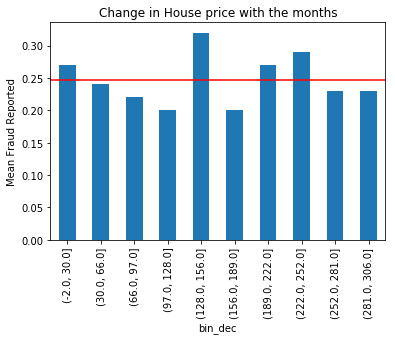

In [16]:
time_data.groupby('bin_dec')['fraud_reported'].mean().plot.bar()
mean = time_data['fraud_reported'].mean()
plt.axhline(y=mean, color='r', linestyle='-')
plt.ylabel('Mean Fraud Reported')
plt.title('Change in House price with the months')

**Comment**: The relationship seems to be significant. Also we have more likely to verify fraud after a month, between 4 and 5, between 7 and 8 and between 8 and 9 months of the policy bind. 
Also notice we have at least one wrong value cause the difference is negative. 
I will consider it anyway

In [17]:
print('The wrong record has policy number: {}'.format(time_data.sort_values('time_to_incident_months').iloc[0]['policy_number']))

The wrong record has policy number: 794731


#### Discrete variables

In [18]:
discrete_variables = [col for col in numerical_variables if len(data[col].unique()) < 30 and col not in time_variables] + missing_variables
data[discrete_variables].head()

,policy_deductable,umbrella_limit,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,collision_type,property_damage,police_report_available
0,1000,0,5,1,1,2,Side Collision,YES,YES
1,2000,5000000,8,1,0,0,NaN,NaN,NaN
2,2000,5000000,7,3,2,3,Rear Collision,NO,NO
3,2000,6000000,5,1,1,2,Front Collision,NaN,NO
4,1000,6000000,20,1,0,1,NaN,NO,NO


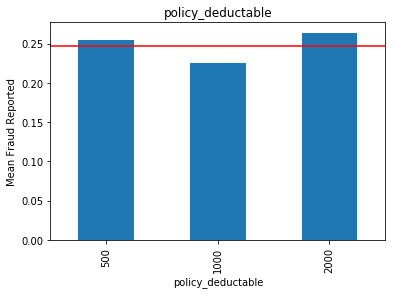

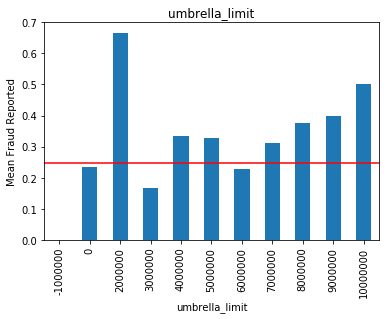

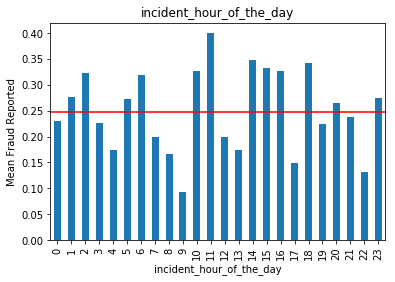

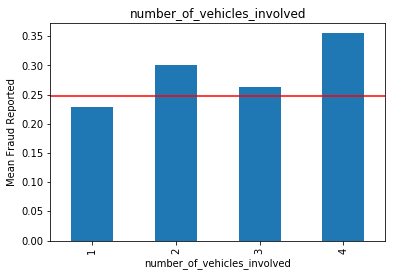

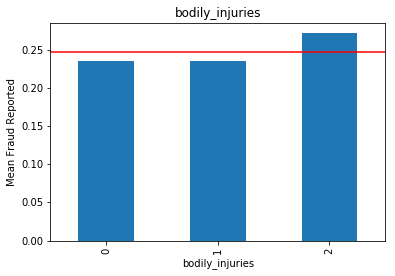

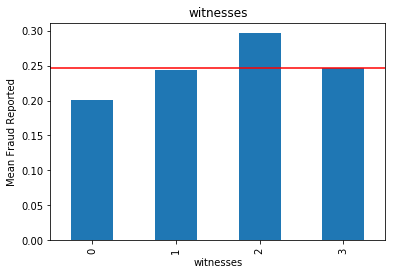

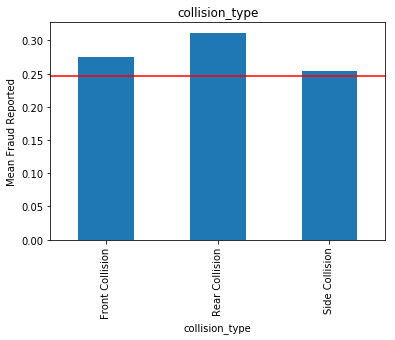

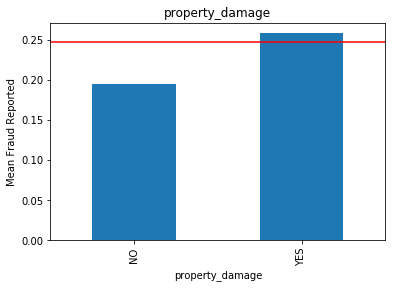

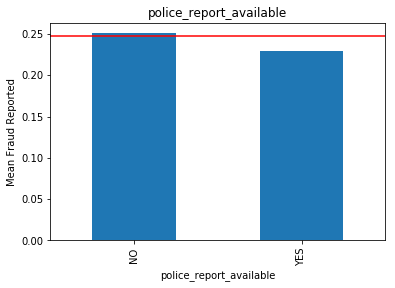

In [19]:
def plot_discrete(df, var):
    df = df.copy()
    # Dummy for target
    df['fraud_reported'] =  np.where(df['fraud_reported'] == 'Y', 1, 0)
    mean = df['fraud_reported'].mean()
     # Dummy for target
    df.groupby(var)['fraud_reported'].mean().plot.bar()
    plt.axhline(y=mean, color='r', linestyle='-')
    plt.title(var)
    plt.ylabel('Mean Fraud Reported')
    plt.show()
    
for var in discrete_variables:
    plot_discrete(data, var)

**Comment**:

policy deductable is how much of an insurance-covered expense is up to policyholder (customer). 

And umbrella limit is excess liability insurance. If a policyholder is sued for damages that exceed the liability limits of car insurance, an umbrella policy helps pay what they owe. 

All of them are significant

#### Continuous variables

In [20]:
continuous_variables = [col for col in numerical_variables if col not in discrete_variables + time_variables]

print('Number of continuous variables: ', len(continuous_variables))

data[continuous_variables].head()

Number of continuous variables:  11


,months_as_customer,age,policy_number,policy_annual_premium,insured_zip,capital_gains,capital_loss,total_claim_amount,injury_claim,property_claim,vehicle_claim
0,328,48,521585,1406.91,466132,53300,0,71610,6510,13020,52080
1,228,42,342868,1197.22,468176,0,0,5070,780,780,3510
2,134,29,687698,1413.14,430632,35100,0,34650,7700,3850,23100
3,256,41,227811,1415.74,608117,48900,-62400,63400,6340,6340,50720
4,228,44,367455,1583.91,610706,66000,-46000,6500,1300,650,4550


In [21]:
continuous_variables = [col for col in numerical_variables if col not in discrete_variables + time_variables and col not in ['insured_zip', 'policy_number', 'total_claim_anount']]

In [22]:
data[continuous_variables].shape

(1000, 9)

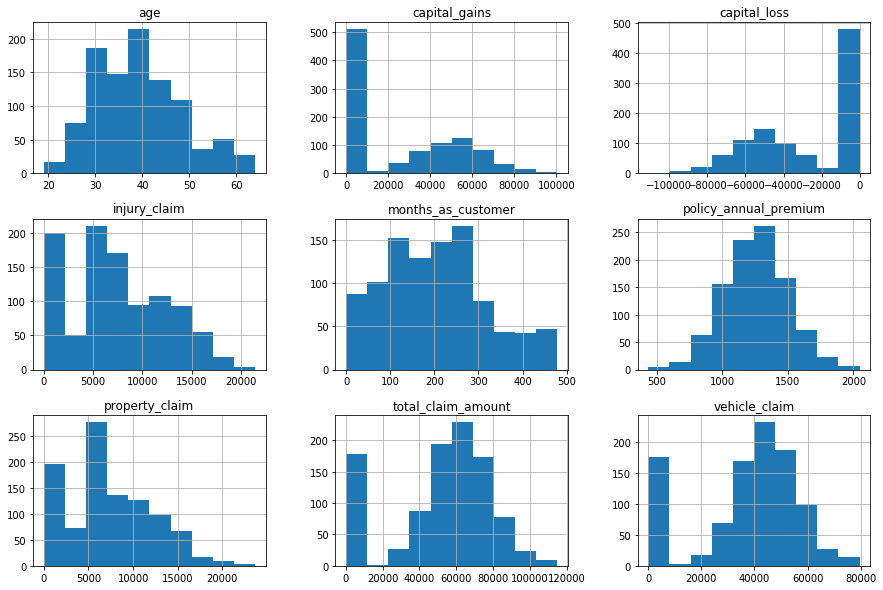

In [23]:
data[continuous_variables].hist(figsize = (15, 10));

**Comment**: Not all distributions are Normal. I'll drop the insurance zip and policy_number. Total_claim_anount is vehicle_claim + property_claim + injury_claim. I can consider to drop Total_claim_anount.
Also they have a different range

**Analyze the relationship between continuous variables and fraud_reported**

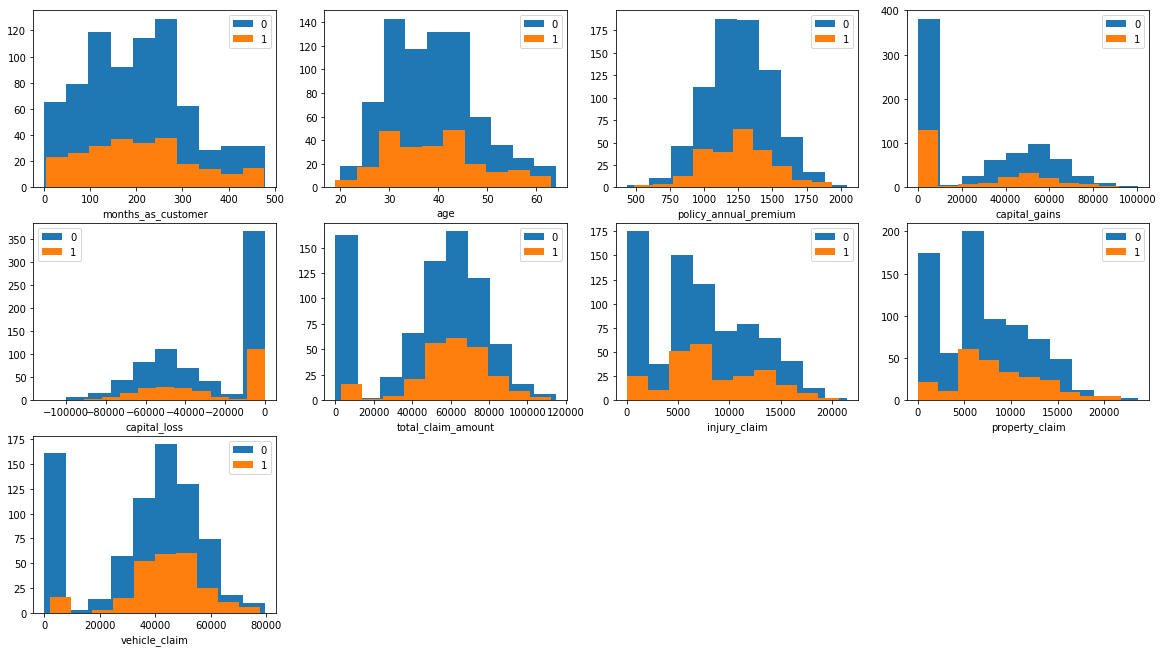

In [24]:
continuous_data = data.copy()
continuous_data['fraud_reported'] =  np.where(data['fraud_reported'] == 'Y', 1, 0)

colors = ['tab:blue', 'tab:orange']
plt.figure(figsize = (20, 15))
# plot histogram
index = 0
for feature in continuous_data[continuous_variables].columns:
    index += 1
    plt.subplot(4, 4, index)
    for label, color in zip(range(len(continuous_data['fraud_reported'].unique())), colors):
        plt.hist(continuous_data[continuous_data.fraud_reported==label][feature], 
                label = str(label), 
                color = color)
    plt.xlabel(feature)
    plt.legend()
plt.show()

**Comment**: Distributions seem quite similar between the two categories. 

**Outliers**

/usr/local/lib/python3.6/dist-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


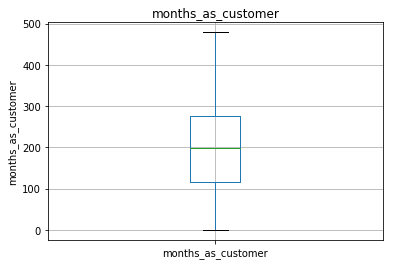

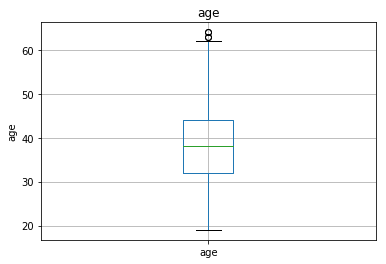

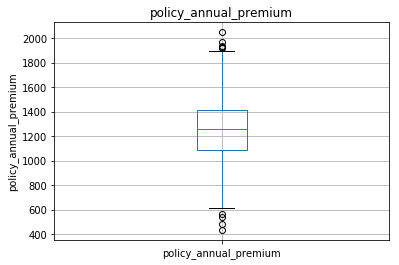

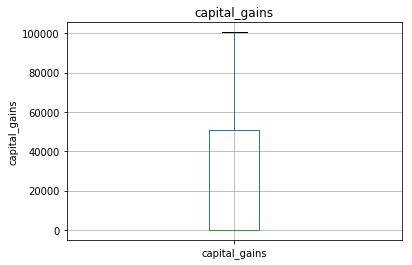

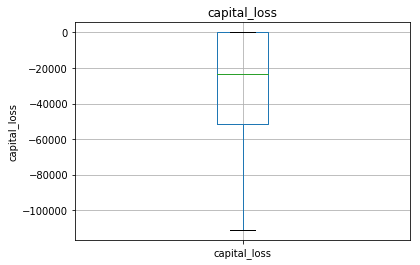

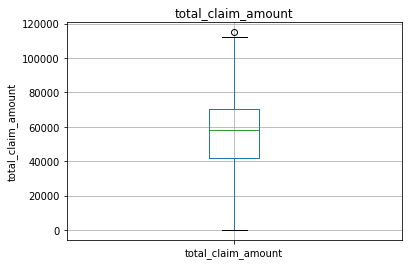

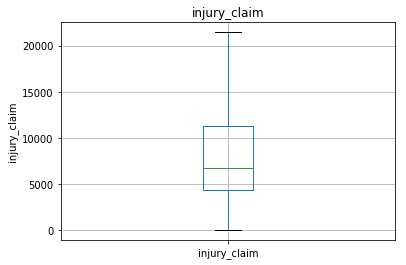

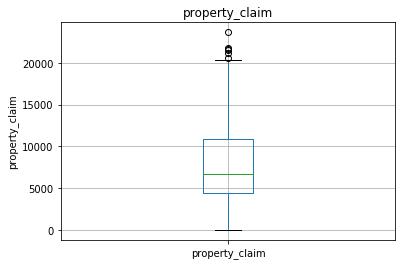

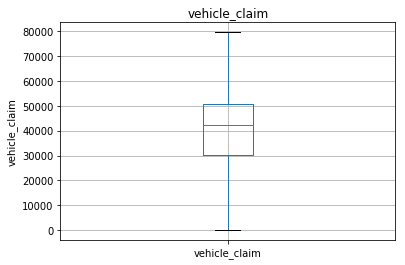

In [25]:
def outlier_tracker(df, var):
    df = df.copy()
    
    df.boxplot(column=var)
    plt.title(var)
    plt.ylabel(var)
    plt.show()


for var in continuous_variables:
    outlier_tracker(data, var)

**Comment**: We have some outliers and they may affect linear performance models.

### Categorical variables

In [26]:
categorical_variables = [col for col in data.columns if data[col].dtypes == 'object']

print('Number of categorical variables: ', len(categorical_variables))

data[categorical_variables].head()

Number of categorical variables:  19


,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,property_damage,police_report_available,auto_make,auto_model,fraud_reported
0,OH,250/500,MALE,MD,craft-repair,sleeping,husband,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,YES,YES,Saab,92x,Y
1,IN,250/500,MALE,MD,machine-op-inspct,reading,other-relative,Vehicle Theft,NaN,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,NaN,NaN,Mercedes,E400,Y
2,OH,100/300,FEMALE,PhD,sales,board-games,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,NO,NO,Dodge,RAM,N
3,IL,250/500,FEMALE,PhD,armed-forces,board-games,unmarried,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,NaN,NO,Chevrolet,Tahoe,Y
4,IL,500/1000,MALE,Associate,sales,board-games,unmarried,Vehicle Theft,NaN,Minor Damage,None,NY,Arlington,3041 3rd Ave,NO,NO,Accura,RSX,N


**Comment**: We have some ordinal variable like incident_severity and insured_education_level. 

#### Check for cardinality

In [27]:
data[categorical_variables].nunique()

policy_state                  3
policy_csl                    3
insured_sex                   2
insured_education_level       7
insured_occupation           14
insured_hobbies              20
insured_relationship          6
incident_type                 4
collision_type                3
incident_severity             4
authorities_contacted         5
incident_state                7
incident_city                 7
incident_location          1000
property_damage               2
police_report_available       2
auto_make                    14
auto_model                   39
fraud_reported                2
dtype: int64

**Comment**: I'll drop incident_location and auto_model. Then, I'll not deal with cardinality cause it's low. 

#### Rare labels

In [28]:
def rare_analyzer(df, var, rare_perc):
    df = df.copy()

    # determine the % of observations per category
    tmp = df.groupby(var)['fraud_reported'].count() / len(df)
    
     # return categories that are rare
    return tmp[tmp < rare_perc]


for var in categorical_variables:
    print(rare_analyzer(data, var, 0.05))
    print()

Series([], Name: fraud_reported, dtype: float64)

Series([], Name: fraud_reported, dtype: float64)

Series([], Name: fraud_reported, dtype: float64)

Series([], Name: fraud_reported, dtype: float64)

Series([], Name: fraud_reported, dtype: float64)

insured_hobbies
base-jumping    0.049
basketball      0.034
board-games     0.048
chess           0.046
cross-fit       0.035
dancing         0.043
polo            0.047
skydiving       0.049
sleeping        0.041
Name: fraud_reported, dtype: float64

Series([], Name: fraud_reported, dtype: float64)

Series([], Name: fraud_reported, dtype: float64)

Series([], Name: fraud_reported, dtype: float64)

Series([], Name: fraud_reported, dtype: float64)

Series([], Name: fraud_reported, dtype: float64)

incident_state
OH    0.023
PA    0.030
Name: fraud_reported, dtype: float64

Series([], Name: fraud_reported, dtype: float64)

incident_location
1012 5th Lane              0.001
1028 Sky Lane              0.001
1030 Pine Lane             0.001
1087

**Comment**: We have Rare labels issue at 0.05. In particular, auto_model and insured_hobbies are too sparse

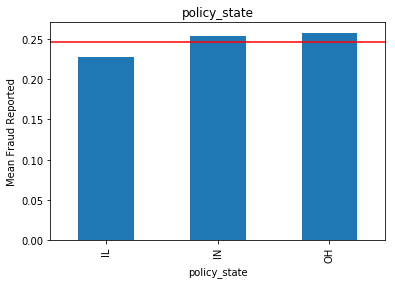

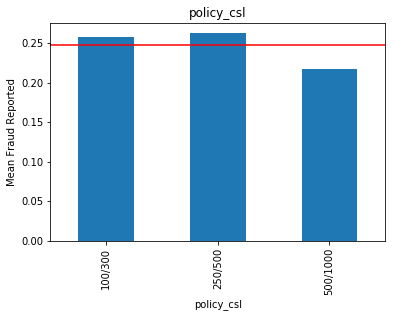

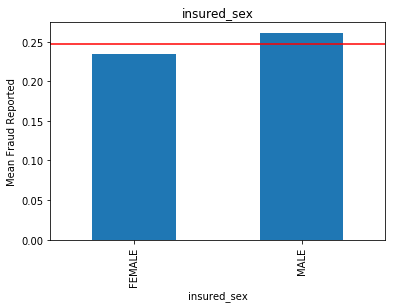

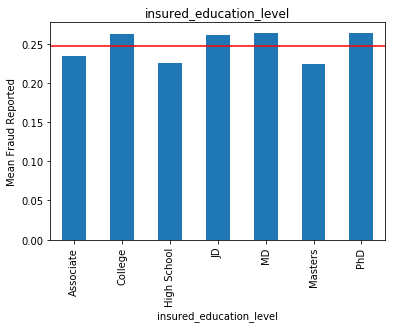

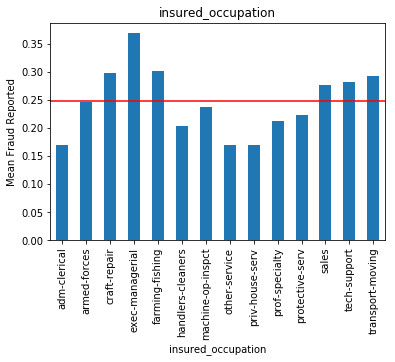

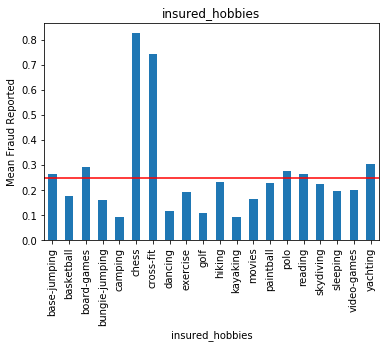

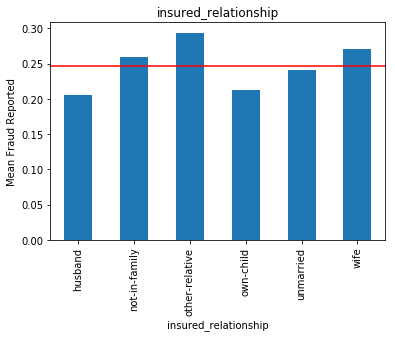

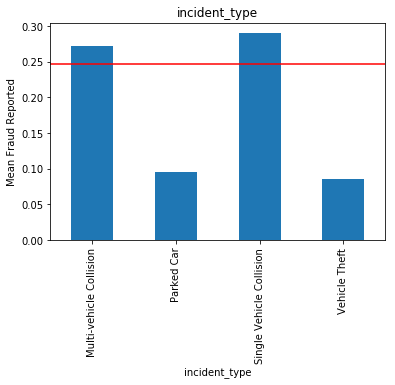

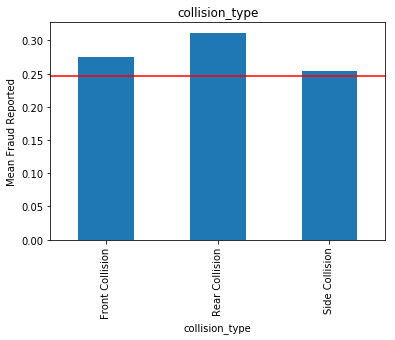

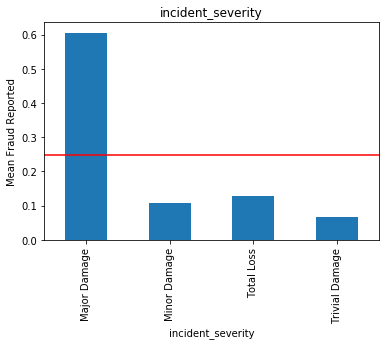

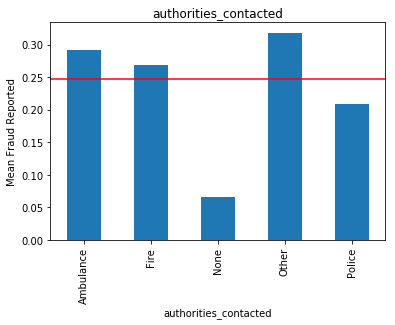

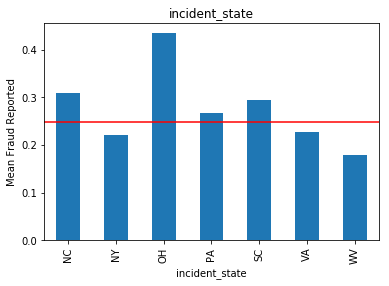

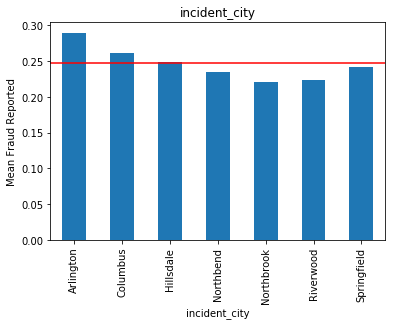

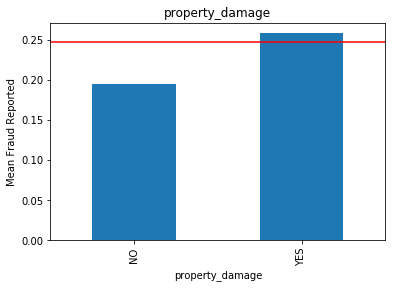

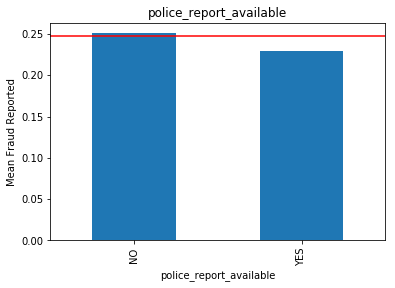

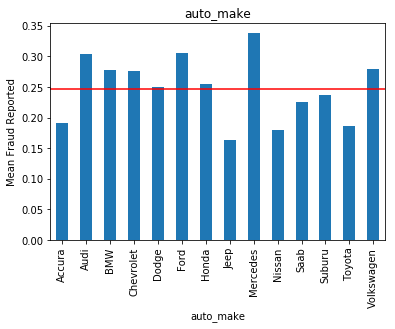

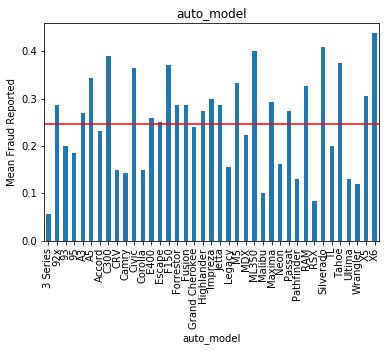

In [29]:
rem_vars = ['fraud_reported', 'incident_location']
catforplot = [var for var in categorical_variables if var not in rem_vars]
for var in catforplot:
    plot_discrete(data, var)

**Comment**: All of them seem to be significant

## Final Comment

We're ready to move on Feature engineering part. 

And we have 

1. Assess missing in ['collision_type', 'property_damage', 'police_report_available']
2. Convert string in datetime in ['policy_bind_date', 'incident_date']
3. Assess umbrella_limit variable
4. Not all distributions are Normal. I'll drop the insurance zip, policy_number and Total_claim_anount
5. age and capital loss
6. They have a different range